# Toronto Neighbourhood Features Graphs

In [4]:
import pandas as pd

In [5]:
#!conda install --yes -c conda-forge geopy

In [51]:
from geopy.geocoders import Nominatim
import requests
import folium
import re
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np
from scipy.stats import pearsonr
import scipy.stats as st
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance

## Getting Merged Data into dataframe

In [7]:
MD_df = pd.read_csv('CS_MERGED_DATA.csv')

In [8]:
MD_df.head(2)

,Borough,Neighbourhood,Latitude,Longitude,Avg Crime,Employment,Population,Density,Avg Income,Transit_Commuting_Percent,Second_Language_Percent,Recreation Places Count
0,North York,Parkwoods,43.753259,-79.329656,12.27,2995.34,26533,5349,34811,14.0,0.0,2
1,North York,Victoria Village,43.725882,-79.315572,33.62,7520.42,17047,3612,29657,15.6,0.0,4


## For exploratory data analysis, correlation of features is done using heatmap plot. It gives a general insight of the relations among features. Highest positive correlation is between density and commuting transit percent where, the negative most correlation is between average income and population.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


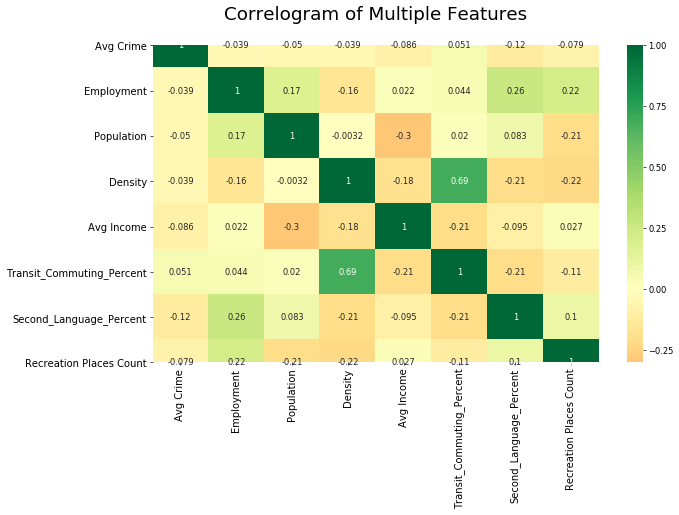

*************
0.6938290625808807
7.939413292581887e-10
Correlation coefficient is close to 1 as 0.69 and p-value is far < 0.001 so it has a strong correlation
*************
5.514682857019195
0.02052128232031738
F-value is not very large as only 5.5 showing mean of both distributions is not far apart and the pvalue is less than 0.05
Pearson correlation coefficient and pvalue tells that there is strong correlation
In ANOVA Test, F-Value and pvalue tells that features are inter-dependent and strongly indistinctable
Therefore, one of them can be removed from the feature set


In [99]:
Explore_df = MD_df[MD_df.columns[4:13]]
Explore_df[MD_df.columns[4:13]] = pd.DataFrame(scaler.fit_transform(Explore_df))

plt.figure(figsize=(12,7), dpi= 60)
sns.heatmap(Explore_df.corr(), xticklabels=Explore_df.corr().columns, yticklabels=Explore_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of Multiple Features\n', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

PC, pvalue = st.pearsonr(Explore_df['Density'], Explore_df['Transit_Commuting_Percent'])
PC, pvalue = st.pearsonr(Explore_df['Density'], Explore_df['Transit_Commuting_Percent'])
a, b = st.f_oneway(Explore_df['Density'], Explore_df['Transit_Commuting_Percent'])
print('*************')
print(PC)
print(pvalue)
print('Correlation coefficient is close to 1 as 0.69 and p-value is far < 0.001 so it has a strong correlation')
print('*************')
print(a)
print(b)
print('F-value is not very large as only 5.5 showing mean of both distributions is not far apart and the pvalue is less than 0.05')
print('Pearson correlation coefficient and pvalue tells that there is strong correlation')
print('In ANOVA Test, F-Value and pvalue tells that features are inter-dependent and strongly indistinctable')
print('Therefore, one of them can be removed from the feature set')



In [10]:
MD_df[MD_df.columns[5:12]] = MD_df[MD_df.columns[5:12]].astype(float)
MD_df[['Avg Income', 'Density']].head(3)

,Avg Income,Density
0,34811.0,5349.0
1,29657.0,3612.0
2,19521.0,16230.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


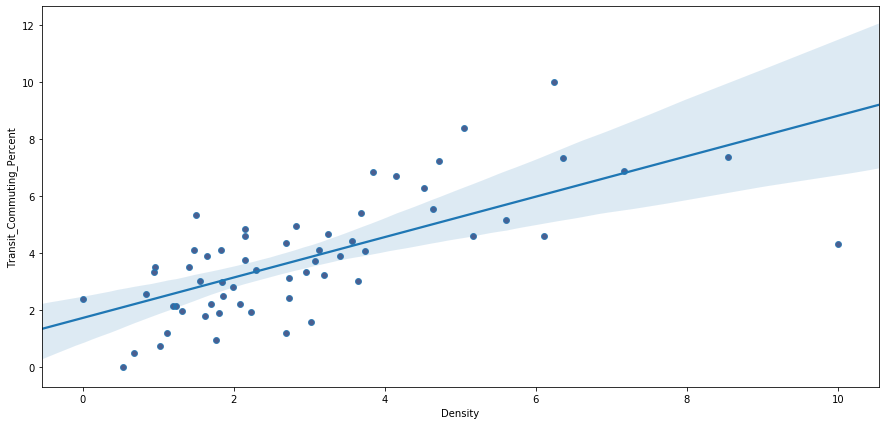

In [167]:
COL = ['Density', 'Transit_Commuting_Percent']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values(COL[0], ascending = True, inplace=True)
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
tmp1.plot(kind='scatter',x=COL[0],y=COL[1], color='red',figsize=(15, 7))
sns.regplot(tmp1[COL[0]], tmp1[COL[1]])

## Stacked Area plot shows a proportional relationship of density with transit commuting percentage of people. Therefore, an area having more transit activity is a good option for running such a business like restaurant but it also needs a parking place, inevitably.

Text(0.5, 1.0, 'Density vs Transit Commuting Percent')

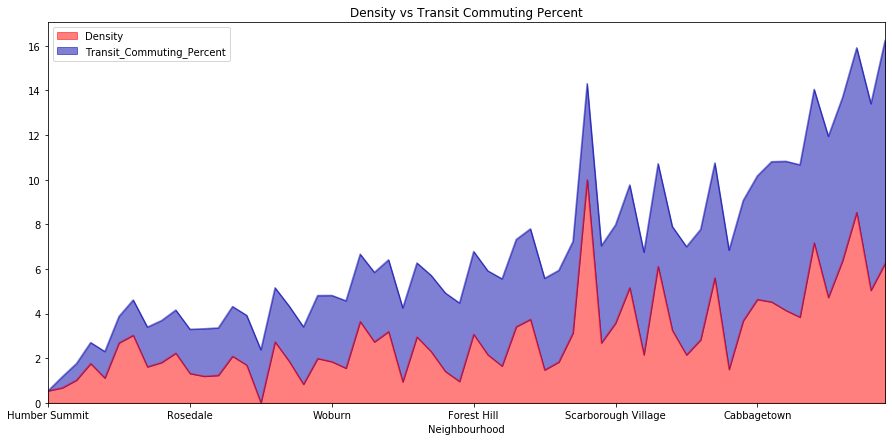

In [168]:
COL = ['Density', 'Transit_Commuting_Percent']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values(COL[1], ascending = True, inplace=True)
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
ax = tmp1.plot(kind='area', alpha=0.5, stacked=True,figsize=(15, 7), color=['#ff0000','#0000aa'])
ax.set_title('Density vs Transit Commuting Percent')

## Average Income is more in the areas where there is generally less population, showing wealthy people living which could be a good location for opening a theme restaurant or with unique idea

Text(0.5, 1.0, 'Population vs Avg Income')

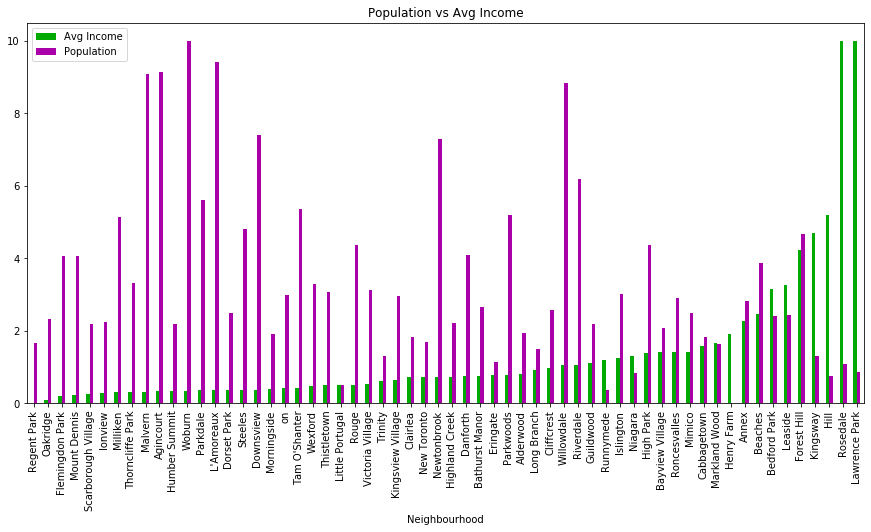

In [117]:
tmp = scaler.fit_transform(MD_df[['Avg Income', 'Population']])
tmp1 = pd.DataFrame(tmp, columns=['Avg Income', 'Population'])
tmp1.sort_values('Avg Income', ascending = True, inplace=True)
#MD_df[['Avg Crime', 'Density']].plot(kind='area', alpha=0.25, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='bar', figsize=(15, 7))
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
ax = tmp1.plot(kind='bar', figsize=(15, 7),color=['#00aa00','#aa00aa'])
ax.set_title('Population vs Avg Income')

## In some Neighbourhoods, the total population is far less to the total employment therefore, those are the neighbourhoods with greater job opportunities. This gives an insight of the neighbourhood being more commercial and/or industrial areas. Those areas are very good for opening a specific time restaurant.

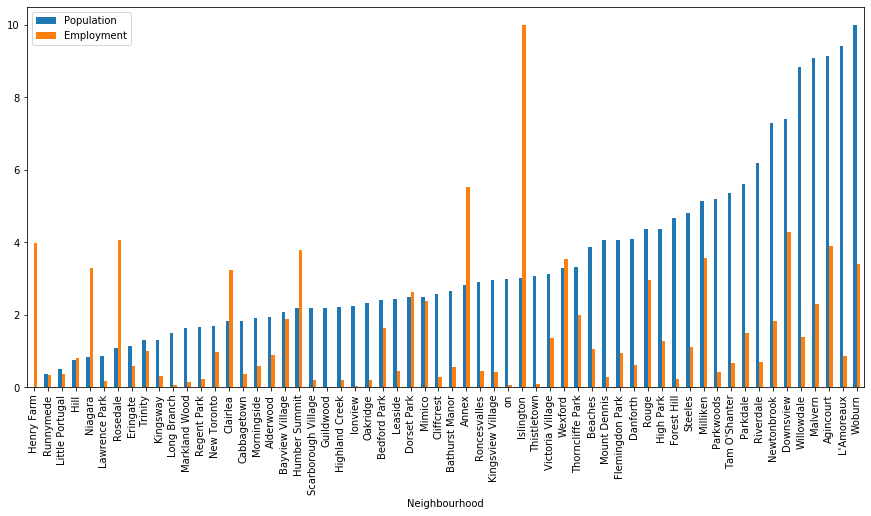

In [13]:
tmp = scaler.fit_transform(MD_df[['Population', 'Employment']])
tmp1 = pd.DataFrame(tmp, columns=['Population', 'Employment'])
tmp1.sort_values('Population', ascending = True, inplace=True)
#MD_df[['Avg Crime', 'Density']].plot(kind='area', alpha=0.25, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='bar', figsize=(15, 7))
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
tmp1.plot(kind='bar', figsize=(15, 7))

## More density means there is less employment opportunities as can be observed from the graph. The jobs are fully packed but can be the ideal place to open a restaurant having more likelihood of a new restaurant to run easily at start

Text(0.5, 1.0, 'Employment vs Density')

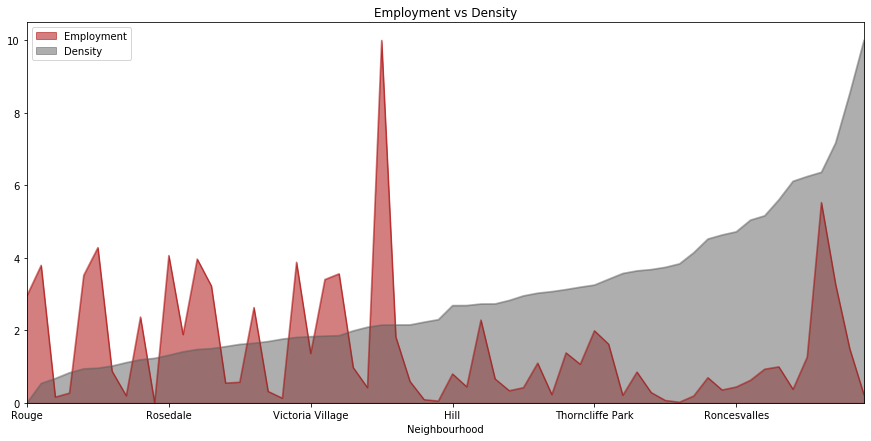

In [131]:
COL = ['Employment', 'Density']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values('Density', ascending = True, inplace=True)
#MD_df[['Avg Crime', 'Density']].plot(kind='area', alpha=0.25, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='bar', figsize=(15, 7))
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
#tmp1.plot(kind='bar', figsize=(15, 7))
#tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(10, 5))
ax = tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(15, 7),color=['#aa0000','#5f5f5f'])
ax.set_title('Employment vs Density')

## With high average income areas, we can see that there is not considerable increase in the employment giving an insight of a residential area of wealthy people. For the restaurant, it may not be a very good place until with a unique attraction. Because of the reason that it also have very less population as can be seen in population vs average income

Text(0.5, 1.0, 'Employment vs Avg Income')

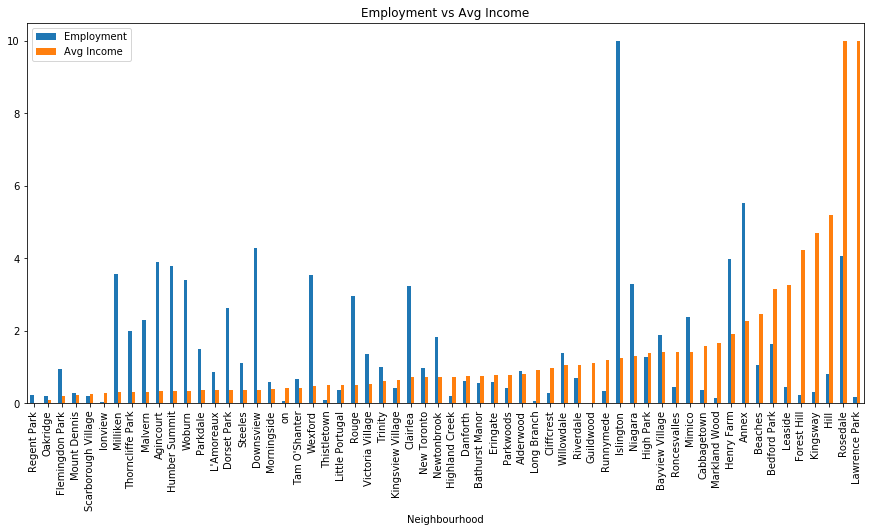

In [142]:
COL = ['Employment', 'Avg Income']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values('Avg Income', ascending = True, inplace=True)
#MD_df[['Avg Crime', 'Density']].plot(kind='area', alpha=0.25, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='bar', figsize=(15, 7))
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
ax = tmp1.plot(kind='bar', figsize=(15, 7))
ax.set_title('Employment vs Avg Income')

## The graph shows a big difference in the average income to the total of recreation places nearby but to a certain limit. This describes the shortage of time of that neighbourhood population which in turn would be the least favorable place to open a business

Text(0.5, 1.0, 'Average Income vs Number of Recreation Places')

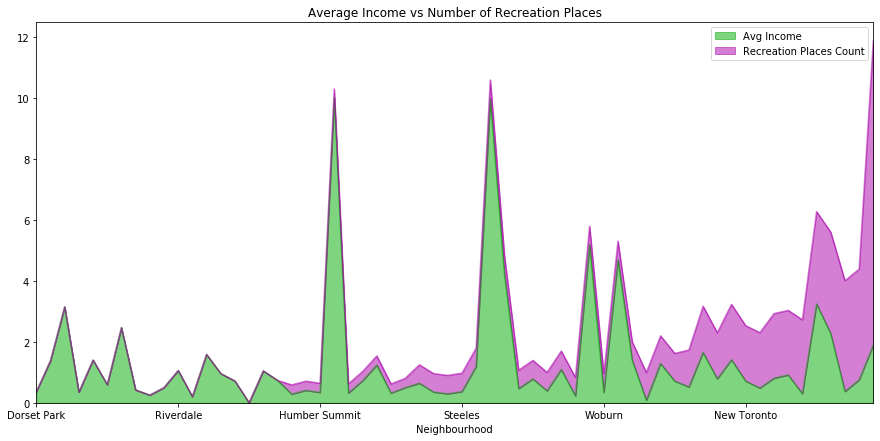

In [161]:
COL = ['Avg Income', 'Recreation Places Count']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values(COL[1], ascending = True, inplace=True)
#MD_df[['Avg Crime', 'Density']].plot(kind='area', alpha=0.25, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='bar', figsize=(15, 7))
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
#tmp1.plot(kind='bar', figsize=(15, 7))
#tmp1.plot(kind='line', stacked = False, figsize=(15, 7))
ax = tmp1.plot(kind='area', alpha=0.5, stacked=True,figsize=(15, 7), color=['#00aa00','#aa00aa'])
ax.set_title('Average Income vs Number of Recreation Places')

## The second language percent feature is describing the Italian population percentage in the neghbourhood already filtered out showing very less average income.

Text(0.5, 1.0, 'Average Income vs Population of Second Language as Italian')

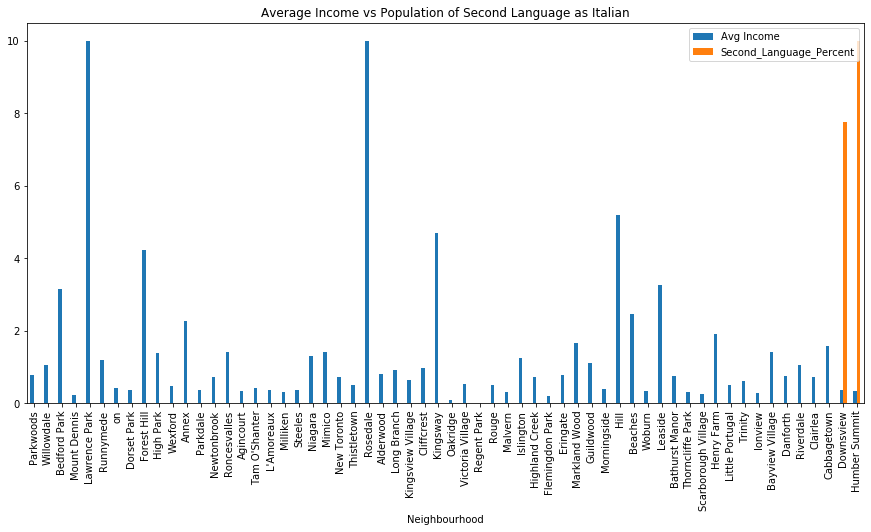

In [194]:
COL = ['Avg Income', 'Second_Language_Percent']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values(COL[1], ascending = True, inplace=True)
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
ax = tmp1.plot(kind='bar',figsize=(15, 7))
ax.set_title('Average Income vs Population of Second Language as Italian')

## From the graph, it is clearly visible that most of the italians don't commute therefore the neighbourhood(in this case Downsview) should be selected where more italians are commuting for restaurant

Text(0.5, 1.0, 'Transit Commuting Population vs Population of Italian Speaking')

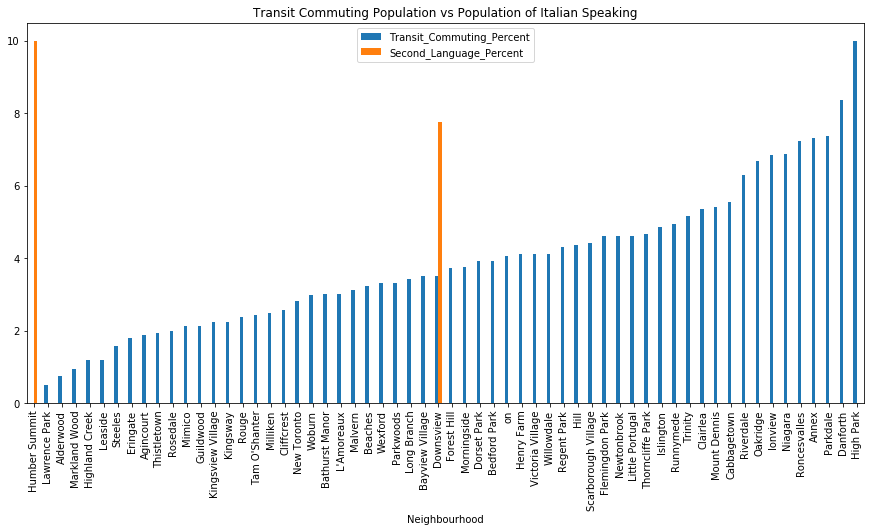

In [197]:
COL = ['Transit_Commuting_Percent', 'Second_Language_Percent']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values(COL[0], ascending = True, inplace=True)
#MD_df[['Avg Crime', 'Density']].plot(kind='area', alpha=0.25, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='area', alpha=0.5, stacked=False,figsize=(10, 5))
#tmp1.plot(kind='bar', figsize=(15, 7))
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
ax = tmp1.plot(kind='bar',figsize=(15, 7))
ax.set_title('Transit Commuting Population vs Population of Italian Speaking')

## The Bubble plot shows that the neighbourhood with low average income and low to medium density there is more crime. It can be seen as with low average income and lesser people commuting for job through transport has more criminal activities in the area having low income at the same time. Keeping in mind that density is directly proportional to Transit Commuting Percentage.

Text(0.5, 1.0, 'Average Income vs Density vs Average Crime')

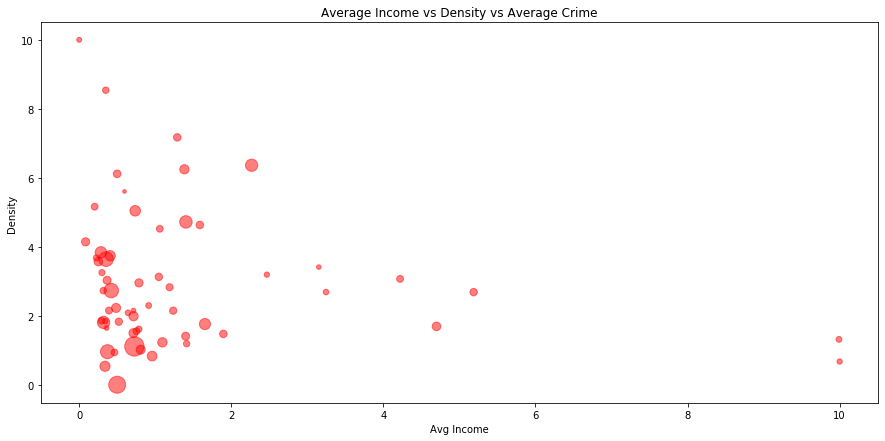

In [203]:

COL = ['Avg Income', 'Density']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values(COL[0], ascending = True, inplace=True)
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
ax = tmp1.plot(kind='scatter', x=COL[0], y=COL[1], figsize=(15, 7),alpha=0.5,color='red',s=MD_df['Avg Crime']*2)
ax.set_title('Average Income vs Density vs Average Crime')

## Among all the other neighbourhoods, ten neighbourhoods cover 50% of the employment where Oakridge, Highland Creek and Scarborough Village cover even 50% of the employment

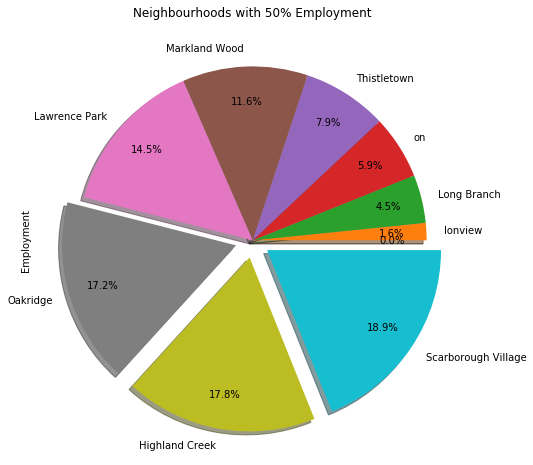

In [98]:
COL = ['Employment']
tmp = scaler.fit_transform(MD_df[COL])
tmp1 = pd.DataFrame(tmp, columns=COL)
tmp1.sort_values(COL[0], ascending = True, inplace=True)
tmp1= tmp1.head(10)
tmp1['Neighbourhood'] = MD_df['Neighbourhood']
tmp1.index=tmp1['Neighbourhood']
plt.title('Neighbourhoods with 50% Employment')
explodePie = [0,0,0,0,0,0,0,0.1,0.1,0.1]
tmp1[COL[0]].plot(kind='pie',figsize=(8, 8),autopct='%1.1f%%', startangle=0,shadow=True, explode=explodePie, pctdistance=0.8)
